### Features
0:site_id 1:visitor_location_country_id 2:prop_country_id 3:prop_starrating 4:prop_review_score 5:prop_brand_bool 6:prop_location_score1 7:prop_location_score2 8:price_usd 9:promotion_flag 10:srch_destination_id 11:srch_length_of_stay 12:srch_booking_window 13:srch_adults_count 14:srch_children_count 15:srch_room_count 16:srch_saturday_night_bool 17:orig_destination_distance 18:random_bool 19:prop_starrating_mean 20:prop_starrating_median 21:prop_starrating_std 22:prop_review_score_mean 23:prop_review_score_median 24:prop_review_score_std 25:prop_location_score1_mean 26:prop_location_score1_median 27:prop_location_score1_std 28:prop_location_score2_mean 29:prop_location_score2_median 30:prop_location_score2_std 31:count_window 32:month 33:week 34:day 35:hour 36:prop_historical_price

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
f = open("feature weights.txt","r")
contents = f.readlines()

In [3]:
features = ['site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool', 'prop_starrating_mean', 'prop_starrating_median', 'prop_starrating_std', 'prop_review_score_mean', 'prop_review_score_median', 'prop_review_score_std', 'prop_location_score1_mean', 'prop_location_score1_median', 'prop_location_score1_std', 'prop_location_score2_mean', 'prop_location_score2_median', 'prop_location_score2_std', 'count_window', 'month', 'week', 'day', 'hour', 'prop_historical_price']
print(features)
print(len(features))

['site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool', 'prop_starrating_mean', 'prop_starrating_median', 'prop_starrating_std', 'prop_review_score_mean', 'prop_review_score_median', 'prop_review_score_std', 'prop_location_score1_mean', 'prop_location_score1_median', 'prop_location_score1_std', 'prop_location_score2_mean', 'prop_location_score2_median', 'prop_location_score2_std', 'count_window', 'month', 'week', 'day', 'hour', 'prop_historical_price']
37


In [4]:
feature_weights = {}
for line in contents:
    line_s = line.split()
    if ':' in line_s:
        feature_index = int(re.search(r'\d+', line_s[0]).group()) - 1
        feature_weight = line_s[2]
        feature = features[feature_index]
        feature_weights[model][feature] = int(feature_weight)
    elif '-' in line_s[0]:
        continue
    else:
        model = line_s[0]
        feature_weights[model] = {}

In [5]:
models = feature_weights.keys()
for model in models:
    used_features = list(feature_weights[model].keys())
    unused_features = [feature for feature in features if feature not in used_features]
    for unused_feature in unused_features:
        feature_weights[model][unused_feature] = 0

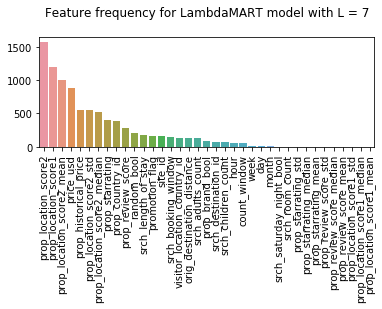

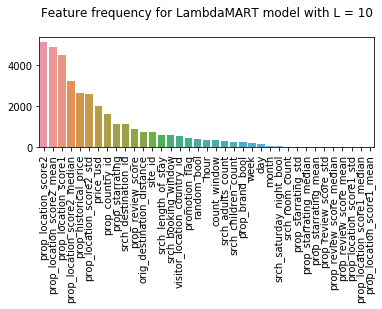

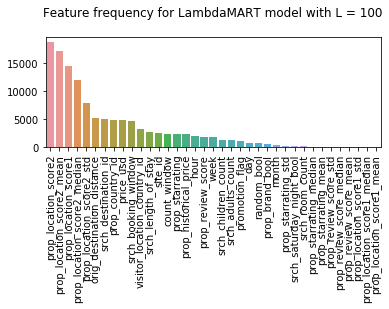

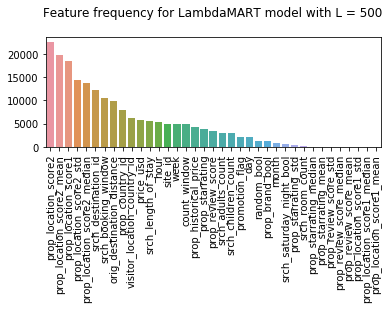

In [7]:
titles = ['L = 7', 'L = 10', 'L = 100', 'L = 500']
for i, model in enumerate(models):
    weights = feature_weights[model]
    feature_names = list(map(lambda x: x, weights.keys()))
    feature_values = list(map(lambda x: weights[x], weights.keys()))
    feature_values, feature_names = (list(t[::-1]) for t in zip(*sorted(zip(feature_values, feature_names))))
    fig, ax = plt.subplots(figsize=(6,4))
    bp = sns.barplot(feature_names, feature_values)

    for item in bp.get_xticklabels():
        item.set_rotation(90)
    plt.subplots_adjust(bottom=0.5)
    plt.title('Feature frequency for LambdaMART model with ' + titles[i] + '\n')
    plt.show()